In [0]:
import pandas as pd
#import numpy as onp
import matplotlib.pyplot as plt
import librosa
import os
import sys
import librosa.display 
import scipy
#import jax.numpy as np
from scipy.io import wavfile as wav
from scipy.io.wavfile import write, read
from scipy.signal import get_window
from scipy.linalg import circulant
from scipy.linalg import hankel
import IPython.display as ipd
from __future__ import division
from IPython.display import clear_output

In [0]:
!nvidia-smi

Thu Jun  4 00:22:10 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
!pip install wavio
!git clone https://github.com/juliagusak/dataloaders
sys.path.append('dataloaders/')
clear_output()

In [0]:
os.chdir('/content/dataloaders')
os.makedirs('/content/datasets/esc')
!python esc/esc_gen.py /content/datasets/esc
clear_output()

###Short Time Fourier Transform

- The Short Time Fourier Transform (STFT) is a special flavor of a Fourier transform 

- where you can see how the frequencies in your signal changes through time.  

- It works by slicing up signals into many small segments and taking the fourier transform of each of these.

- STFTs can be used as a way of quantifying the change of a nonstationary signal’s frequency and phase content over time.

In [0]:
from esc import ESCDatasets

In [0]:
df_esc50 = pd.read_csv('/content/datasets/esc/esc50/ESC-50-master/meta/esc50.csv')
df_esc50.head()

,filename,fold,target,category,esc10,src_file,take
0,1-100032-A-0.wav,1,0,dog,True,100032,A
1,1-100038-A-14.wav,1,14,chirping_birds,False,100038,A
2,1-100210-A-36.wav,1,36,vacuum_cleaner,False,100210,A
3,1-100210-B-36.wav,1,36,vacuum_cleaner,False,100210,B
4,1-101296-A-19.wav,1,19,thunderstorm,False,101296,A


sampling rate: 22050
wav shape: (110250,)


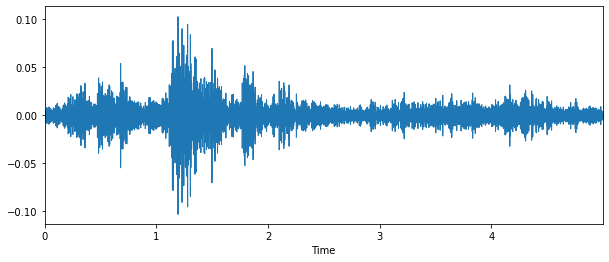

In [0]:
#getting a single directory...
dir_1 = "/content/datasets/esc/esc50/ESC-50-master/audio/1-101296-A-19.wav"
audio_data,sample_rate = librosa.load(dir_1)  
plt.figure(figsize=(10,4))
print('sampling rate:', sample_rate)
print('wav shape:', audio_data.shape)
_ = librosa.display.waveplot(audio_data,sr=sample_rate)
ipd.Audio(dir_1)

In [0]:
audio_data[:22050]

array([-0.00037225, -0.00077188,  0.00029651, ...,  0.00563387,
        0.00427489,  0.00374379], dtype=float32)

Bird_chirping...
sampling rate: 22050
wav shape: (110250,)


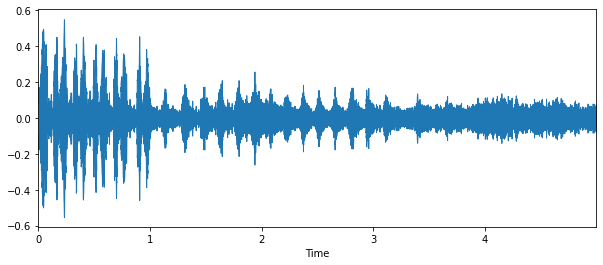

In [0]:
#dATASET...DOG BARKING....
print("Bird_chirping...")
dir_2 =  "/content/datasets/esc/esc50/ESC-50-master/audio/1-100038-A-14.wav"
plt.figure(figsize=(10,4))
data_bird,sample_rate = librosa.load(dir_2)
print('sampling rate:', sample_rate)
print('wav shape:', data_bird.shape)
_ = librosa.display.waveplot(data_bird,sr=sample_rate)
ipd.Audio(dir_2)

In [0]:
exactl

###Short Time Fourier Transform

In [0]:
sampled_Freq, Segment_times, STFT_values = scipy.signal.stft(audio_data,
                                                             sample_rate,nperseg=1000)  #nperseg == legbght of each segment

In [0]:
print("Shape of sampled Frequency ", sampled_Freq.shape)
print("shape of segment Time ", Segment_times.shape)
print("shape of the STFT", STFT_values.shape)

Shape of sampled Frequency  (501,)
shape of segment Time  (222,)
shape of the STFT (501, 222)


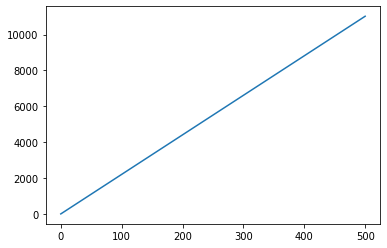

In [0]:
plt.plot(sampled_Freq)

In [0]:
STFT_values

array([[-1.0175793e-05+0.0000000e+00j,  9.9762110e-06+0.0000000e+00j,
         1.5736598e-05+0.0000000e+00j, ...,
        -4.2631567e-05+0.0000000e+00j, -3.2294975e-05+0.0000000e+00j,
        -1.3832273e-05+0.0000000e+00j],
       [ 3.1131687e-05-4.8657617e-05j,  8.6793165e-07-3.6264741e-05j,
        -5.0930761e-05+7.6352415e-05j, ...,
         9.8040407e-05-1.1800786e-04j, -9.6990188e-06+6.3352409e-06j,
        -1.1278468e-05+1.2851999e-05j],
       [ 5.2896918e-05+1.4827987e-04j, -1.2785297e-04+4.1396113e-05j,
         1.9226554e-04-2.3335633e-04j, ...,
        -1.7389358e-04+7.0500551e-05j,  5.7807636e-05-5.8482387e-05j,
         8.4629328e-06+2.3394457e-05j],
       ...,
       [ 5.5220750e-07-9.3965573e-09j, -7.0577313e-09-3.3287537e-09j,
        -2.8188698e-09-2.0525921e-08j, ...,
         4.9685760e-08+7.9284588e-09j,  6.7224306e-07+4.2883912e-08j,
         6.8328734e-07+6.3383858e-09j],
       [-5.7275076e-07-5.7441274e-09j,  4.2847002e-09-1.2861289e-09j,
        -4.0182129e-09

In [0]:
Magnitude = abs(STFT_values)   #...,By computing the magnitude of each of the STFT  values
Magnitude                       #shape of teh magnitude is same as the shape of teh STFT 

array([[1.01757932e-05, 9.97621100e-06, 1.57365976e-05, ...,
        4.26315673e-05, 3.22949745e-05, 1.38322730e-05],
       [5.77645696e-05, 3.62751271e-05, 9.17803554e-05, ...,
        1.53420260e-04, 1.15847415e-05, 1.70990552e-05],
       [1.57432529e-04, 1.34387577e-04, 3.02359404e-04, ...,
        1.87641432e-04, 8.22308502e-05, 2.48781398e-05],
       ...,
       [5.52287418e-07, 7.80334375e-09, 2.07185771e-08, ...,
        5.03143625e-08, 6.73609520e-07, 6.83316728e-07],
       [5.72779584e-07, 4.47356507e-09, 2.43918379e-08, ...,
        3.19028288e-08, 6.62106117e-07, 6.81697031e-07],
       [5.82522205e-07, 1.71088388e-08, 1.34281262e-08, ...,
        3.46121531e-08, 6.64230072e-07, 6.80738083e-07]], dtype=float32)

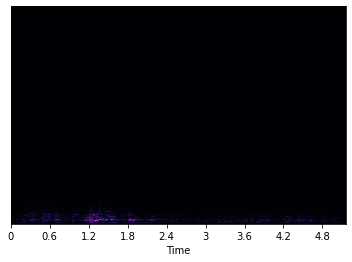

In [0]:
librosa.display.specshow(Magnitude,sr = sample_rate, x_axis = 'time')

Text(0.5, 0, 'Time in sec')

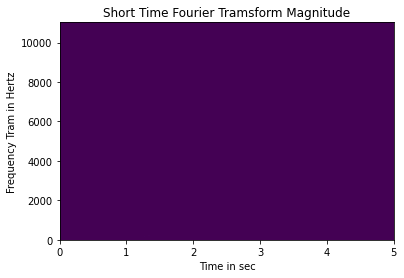

In [0]:
plt.pcolormesh(Segment_times,sampled_Freq,Magnitude,vmin=0,vmax=amp)
plt.title("Short Time Fourier Tramsform Magnitude")
plt.ylabel("Frequency Tram in Hertz")
plt.xlabel("Time in sec")

- Generate a test signal, a 2 Vrms sine wave whose frequency is slowly modulated around 3kHz, corrupted by white noise of exponentially decreasing magnitude sampled at 10 kHz.

In [0]:
fs = 10e3                       #..sampling rate of the input signal
N = 1e5                         #..  
amp = 2 * np.sqrt(2)            #..Amplitude value
noise_power = 0.01 * fs / 2
time = np.arange(N) / float(fs)
mod = 500*np.cos(2*np.pi*0.25*time)
carrier = amp * np.sin(2*np.pi*3e3*time + mod)  #signal components
noise = np.random.normal(scale=np.sqrt(noise_power),
                       size=time.shape)
noise *= np.exp(-time/5)
x = carrier + noise

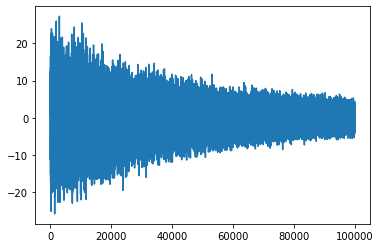

In [0]:
plt.plot(x)

In [0]:
sampled_Freq, Segment_times, STFT_values = scipy.signal.stft(x,fs,nperseg=1000)  #nperseg == legbght of each segment

In [0]:
print("Shape of sampled Frequency ", sampled_Freq.shape)
print("shape of segment Time ", Segment_times.shape)
print("shape of the STFT", STFT_values.shape)

Shape of sampled Frequency  (501,)
shape of segment Time  (201,)
shape of the STFT (501, 201)


In [0]:
STFT_values   #....each of the STFT depict a complex variable

array([[ 2.04162308e-01+0.j        , -2.28158362e-01+0.j        ,
        -5.84562681e-01+0.j        , ..., -3.40354915e-02+0.j        ,
        -2.64851585e-03+0.j        , -4.77066706e-02+0.j        ],
       [-1.71562587e-01+0.11147043j,  1.14152295e-01-0.1410193j ,
         2.91251844e-01-0.06645679j, ...,  1.87342866e-02-0.0141618j ,
        -2.86856656e-02-0.01067924j,  2.69453821e-02+0.02616872j],
       [ 2.20831782e-02-0.16069216j,  1.09251437e-01-0.03101872j,
         1.13431069e-01+0.13516025j, ..., -2.05346169e-02+0.01731909j,
         6.77129656e-02+0.00284301j, -6.77065407e-03-0.01624618j],
       ...,
       [ 1.39290854e-01+0.05150261j, -3.58393493e-02+0.27374481j,
         1.17177488e-01+0.05238181j, ...,  1.74809713e-02-0.01197222j,
         8.45285921e-04+0.00060213j, -2.30278960e-03-0.01716739j],
       [-1.35117483e-01-0.0046569j , -3.10186118e-02-0.10766619j,
         2.85781530e-01-0.01394343j, ...,  4.39806951e-02+0.00614663j,
        -4.61051597e-04-0.02963399j

In [0]:
Magnitude = abs(STFT_values)   #...,By computing the magnitude of each of the STFT  values
Magnitude                       #shape of teh magnitude is same as the shape of teh STFT 

array([[0.20416231, 0.22815836, 0.58456268, ..., 0.03403549, 0.00264852,
        0.04770667],
       [0.20459564, 0.18143095, 0.29873758, ..., 0.02348468, 0.03060904,
        0.03756136],
       [0.16220246, 0.11356953, 0.17645085, ..., 0.02686301, 0.06777262,
        0.01760057],
       ...,
       [0.14850744, 0.27608093, 0.12835271, ..., 0.02118769, 0.00103782,
        0.01732114],
       [0.13519771, 0.11204536, 0.28612148, ..., 0.04440814, 0.02963758,
        0.02103274],
       [0.11087818, 0.04774857, 0.39050696, ..., 0.08759199, 0.00935568,
        0.02256328]])

In [0]:
Magnitude.shape

(501, 201)

Text(0.5, 0, 'Time in sec')

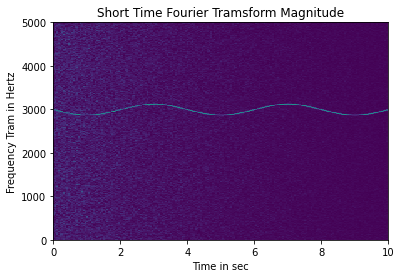

In [0]:
plt.pcolormesh(Segment_times,sampled_Freq,Magnitude,vmin=0,vmax=amp)
plt.title("Short Time Fourier Tramsform Magnitude")
plt.ylabel("Frequency Tram in Hertz")
plt.xlabel("Time in sec")

In [0]:
#audio_data[-2] - audio_data[-3]

0.0004215669

In [0]:
t = np.linspace(0,10,128)    #give me 128 exactly spaced samples between 0 and (N)
                              #this is my constant time interval
x = np.linspace(1, 128, 128)   

In [0]:
Amp = (2+1j)*x          #complex amplitude
Freq = np.exp(2.5j*x*t)

In [0]:
N = 128
for i in range(1,N):
  yt = sum(Amp*Freq)

In [0]:
y_real = yt.real
y_real

-368.9204890727997

In [0]:
def frange(start, stop, step=1.0):
    i = start
    while i < stop:
        yield i
        i += step

In [0]:
#y_new = abs(y_real)/abs(yt)
y_new = y_real
y_new

-368.9204890727997

In [0]:
get_list = list(frange(y_new,y_new+(2*N),1))    #in orderto detect N frequencies, delayed observables with at least 2N time delays must be formed:
zt = np.asarray(get_list,dtype=np.float32)
len(zt)

256

In [0]:
#zt = zt.T[np.newaxis]
zt

DeviceArray([-368.9205 , -367.9205 , -366.9205 , -365.9205 , -364.9205 ,
             -363.9205 , -362.9205 , -361.9205 , -360.9205 , -359.9205 ,
             -358.9205 , -357.9205 , -356.9205 , -355.9205 , -354.9205 ,
             -353.9205 , -352.9205 , -351.9205 , -350.9205 , -349.9205 ,
             -348.9205 , -347.9205 , -346.9205 , -345.9205 , -344.9205 ,
             -343.9205 , -342.9205 , -341.9205 , -340.9205 , -339.9205 ,
             -338.9205 , -337.9205 , -336.9205 , -335.9205 , -334.9205 ,
             -333.9205 , -332.9205 , -331.9205 , -330.9205 , -329.9205 ,
             -328.9205 , -327.9205 , -326.9205 , -325.9205 , -324.9205 ,
             -323.9205 , -322.9205 , -321.9205 , -320.9205 , -319.9205 ,
             -318.9205 , -317.9205 , -316.9205 , -315.9205 , -314.9205 ,
             -313.9205 , -312.9205 , -311.9205 , -310.9205 , -309.9205 ,
             -308.9205 , -307.9205 , -306.9205 , -305.9205 , -304.9205 ,
             -303.9205 , -302.9205 , -301.9205 , -3

In [0]:
print(zt.shape)

(256,)


In [0]:
# new = circulant(zt) ######
# new[:5,:5] 

In [0]:
hank_mat = hankel(zt,zt)
hank_mat = np.round(hank_mat,2)
hank_mat.shape

(256, 256)

In [0]:
hank_mat[:7,:7].T[np.newaxis]

array([[[-368.87, -367.87, -366.87, -365.87, -364.87, -363.87, -362.87],
        [-367.87, -366.87, -365.87, -364.87, -363.87, -362.87, -361.87],
        [-366.87, -365.87, -364.87, -363.87, -362.87, -361.87, -360.87],
        [-365.87, -364.87, -363.87, -362.87, -361.87, -360.87, -359.87],
        [-364.87, -363.87, -362.87, -361.87, -360.87, -359.87, -358.87],
        [-363.87, -362.87, -361.87, -360.87, -359.87, -358.87, -357.87],
        [-362.87, -361.87, -360.87, -359.87, -358.87, -357.87, -356.87]]],
      dtype=float32)

In [0]:
# mat = np.array([1,2,3,4])
# hankel([1,2,3,4,5,6,7,8,9,10],[1,2,3,4,5,6,7,8,9,10])

In [0]:
hank_mat[:,0].shape   ###verify with 1st column...1st column...new.shape

(256,)

In [0]:
ZZt = hank_mat[:,:64]    ###get 1st 64 columns into the new matrix...
ZZt                      ##from [z_t ......z_t+N-1]

DeviceArray([[-368.91998, -367.91998, -366.91998, ..., -307.91998,
              -306.91998, -305.91998],
             [-367.91998, -366.91998, -365.91998, ..., -306.91998,
              -305.91998, -304.91998],
             [-366.91998, -365.91998, -364.91998, ..., -305.91998,
              -304.91998, -303.91998],
             ...,
             [-115.92   , -114.92   , -113.92   , ..., -309.91998,
              -308.91998, -307.91998],
             [-114.92   , -113.92   , -367.91998, ..., -308.91998,
              -307.91998, -306.91998],
             [-113.92   , -367.91998, -366.91998, ..., -307.91998,
              -306.91998, -305.91998]], dtype=float32)

In [0]:
ZZt[-1]

array([-113.87, -367.87, -366.87, -365.87, -364.87, -363.87, -362.87,
       -361.87, -360.87, -359.87, -358.87, -357.87, -356.87, -355.87,
       -354.87, -353.87, -352.87, -351.87, -350.87, -349.87, -348.87,
       -347.87, -346.87, -345.87, -344.87, -343.87, -342.87, -341.87,
       -340.87, -339.87, -338.87, -337.87, -336.87, -335.87, -334.87,
       -333.87, -332.87, -331.87, -330.87, -329.87, -328.87, -327.87,
       -326.87, -325.87, -324.87, -323.87, -322.87, -321.87, -320.87,
       -319.87, -318.87, -317.87, -316.87, -315.87, -314.87, -313.87,
       -312.87, -311.87, -310.87, -309.87, -308.87, -307.87, -306.87,
       -305.87], dtype=float32)

In [0]:
ZZt_step = hank_mat[:,1:65]    ##from [z_t+1 ......z_t+N]
ZZt_step                  ##from the 2nd column to the 65th column  

DeviceArray([[-367.91998, -366.91998, -365.91998, ..., -306.91998,
              -305.91998, -304.91998],
             [-366.91998, -365.91998, -364.91998, ..., -305.91998,
              -304.91998, -303.91998],
             [-365.91998, -364.91998, -363.91998, ..., -304.91998,
              -303.91998, -302.91998],
             ...,
             [-114.92   , -113.92   , -367.91998, ..., -308.91998,
              -307.91998, -306.91998],
             [-113.92   , -367.91998, -366.91998, ..., -307.91998,
              -306.91998, -305.91998],
             [-367.91998, -366.91998, -365.91998, ..., -306.91998,
              -305.91998, -304.91998]], dtype=float32)

In [0]:
ZZt_step.shape

(256, 64)

In [0]:
ZZT_PINV = np.linalg.pinv(ZZt)    #Calculate the peudoinverse of Zt
ZZT_PINV.shape

(64, 256)

In [0]:
KT = np.matmul(ZZt_step,ZZT_PINV)  ####compute

In [0]:
KT    #my square matrix to compute DMD on

DeviceArray([[ 8.5877562e-03,  8.5660890e-03,  8.5444190e-03, ...,
               1.3333469e-03,  1.3330199e-03,  1.3320576e-03],
             [ 8.5660219e-03,  8.5444208e-03,  8.5228123e-03, ...,
               1.3177113e-03,  1.3174419e-03,  1.3164190e-03],
             [ 8.5442849e-03,  8.5227499e-03,  8.5012075e-03, ...,
               1.3020759e-03,  1.3017447e-03,  1.3007808e-03],
             ...,
             [ 1.3506205e-03,  1.3328712e-03,  1.3173257e-03, ...,
              -1.5243865e-04,  9.9984771e-01, -1.5238184e-04],
             [ 1.3477160e-03,  1.3329410e-03,  1.3173306e-03, ...,
              -1.5221979e-04, -1.5212758e-04,  9.9984711e-01],
             [ 8.5877562e-03,  8.5660890e-03,  8.5444190e-03, ...,
               1.3333469e-03,  1.3330199e-03,  1.3320576e-03]],            dtype=float32)

In [0]:
KT.shape

(256, 256)

In [0]:
pip install pydmd

In [0]:
from pydmd import DMD

In [0]:
sys_DMD = DMD()
sys_DMD.fit(KT)    #fitting ordinary DMD on the resulting matrices...

In [0]:
SYS_MODE = sys_DMD.modes
SYS_DYNAMICS = sys_DMD.dynamics

print(SYS_MODE.shape)       #the columns gives the modes...i.e 67 modes
print(SYS_DYNAMICS.shape)

(256, 68)
(68, 256)


In [0]:
mode_3 = SYS_MODE[:,:3]
mode_3.shape   ##

(256, 3)

In [0]:
mode_3.T.shape

(3, 256)

In [0]:
x_ = np.linspace(0,10,256)       #for the mapping 

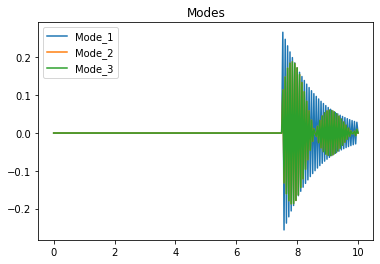

In [0]:
#Visualization of the system Mode
legend = ["Mode_1","Mode_2","Mode_3"]
for m in mode_3.T:       #notice the "sys_Mode.T",
  plt.plot(x_,m.real)    #m.real ---> means we use the real part (not the imaginary part)
  plt.title("Modes")
  plt.legend(legend)
plt.show()

In [0]:
t_ = np.linspace(0,10,3)       #for the mapping 

In [0]:
dynamics_3 = SYS_DYNAMICS[:,:3]
dynamics_3.T.shape   ####

(3, 68)

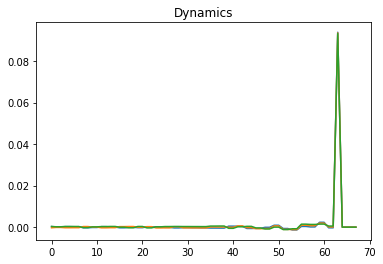

In [0]:
for d in dynamics_3.T:
  plt.plot(d.real)    
  plt.title("Dynamics")
plt.show()

In [0]:
sys_DMD2 = DMD(svd_rank=0, exact=True, opt=True)
sys_DMD2.fit(KT)   

In [0]:
SYS_MODE2 = sys_DMD2.modes
SYS_DYNAMICS2 = sys_DMD2.dynamics

print(SYS_MODE2.shape)    #the columns gives the modes...i.e 67 modes
print(SYS_DYNAMICS2.shape)

(256, 68)
(68, 256)


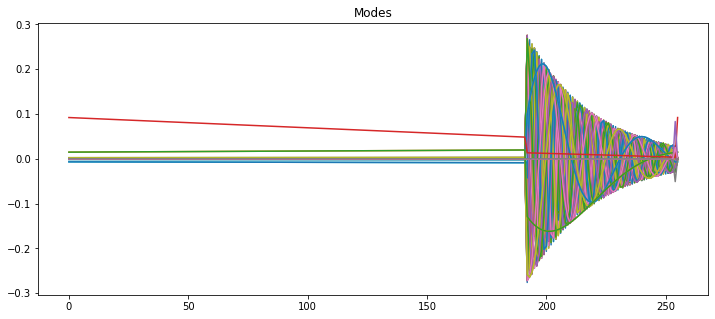

In [0]:
#Visualization all the mode...
#legend = ["Mode_1","Mode_2"]
plt.figure(figsize=(12,5))
for m in SYS_MODE2.T:       
  plt.plot(m.real)        
  plt.title("Modes")
  #plt.legend(legend)
plt.show()

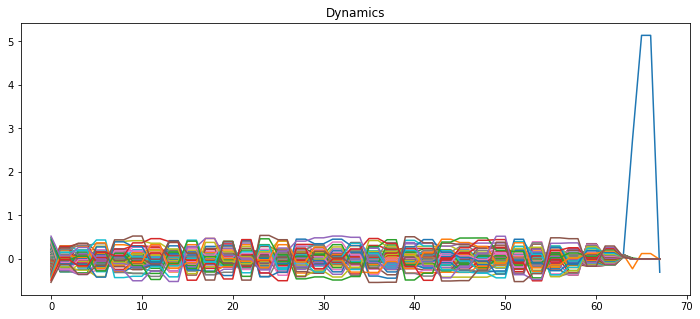

In [0]:
plt.figure(figsize=(12,5))
for d in SYS_DYNAMICS2.T:
  plt.plot(d.real)    
  plt.title("Dynamics")
plt.show()

In [0]:
SYS_DYNAMICS2.shape

(67, 256)

In [0]:
#SYS_DYNAMICS2.T

- Computing Eigenvalues and looking at stability

In [0]:
print(sys_DMD.eigs.shape)
e1 = sys_DMD.eigs[0]
e2 = sys_DMD.eigs[1]
e3 =  sys_DMD.eigs[2]

(68,)


In [0]:
#evaluating distance of each eigenvaue from the unit circle
eigens = [e1,e2,e3]
for e in eigens:  
  print('Eigenvalue {}: distance from unit circle {}'.format(e, round(np.abs((e.imag**2+e.real**2)- 1),2)))

Eigenvalue (-1.036933422088623+0j): distance from unit circle 0.08
Eigenvalue (-1.0317827463150024+0.10325411707162857j): distance from unit circle 0.08
Eigenvalue (-1.0317827463150024-0.10325411707162857j): distance from unit circle 0.08


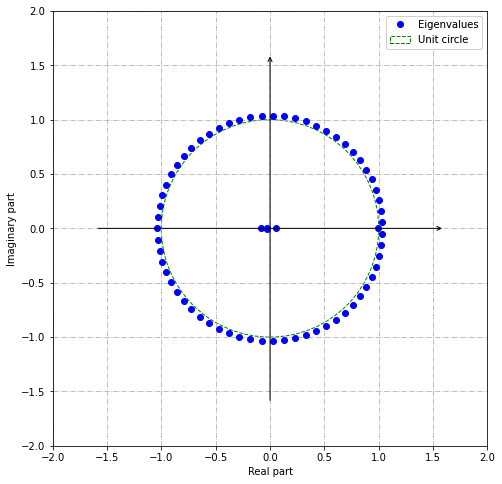

In [0]:
#using the "plot_eigs" 
sys_DMD.plot_eigs(show_axes=True, show_unit_circle=True)  #plotting on a unit_circle

In [0]:
#checking the actual number of svd rank needed
s = np.array([snapshot.flatten() for snapshot in KT]).T
svd_snaps = scipy.linalg.svdvals(s)

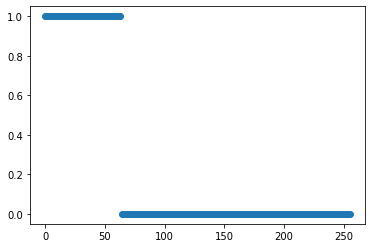

In [0]:
#plt.figure(figsize=(12,10))
fig = plt.plot(svd_snaps,'o')

- A trial with Higher Order Dynamic Mode Decomposition 

In [0]:
from pydmd import HODMD

In [0]:
h_ODMD = HODMD( svd_rank=0,exact=True,opt=True,d=30)
h_ODMD.fit(KT)

In [0]:
h_modes = h_ODMD.modes
h_dynamics = h_ODMD.dynamics
print(h_modes.shape)
print(h_dynamics.shape)

(256, 88)
(88, 256)


Number  of Eigenvalues:  88




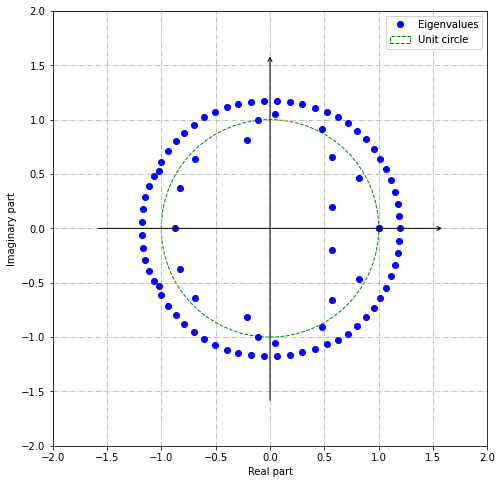

In [0]:
print("Number  of Eigenvalues: ", len(h_ODMD.eigs))
print("\n")
h_ODMD.plot_eigs()

In [0]:
KT.shape

(256, 256)

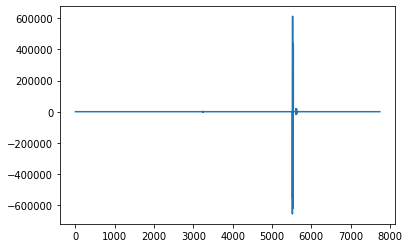

In [0]:
plt.plot(h_ODMD.atilde.flatten())

### Computing Frequency from the Eigen values:


- The eigenvalue $\lambda_{j}$ corresponds to the temporal dynamics of each spatial mode $\phi_{j}$

- Specifically its rate of growth/decay and frequency of oscillation 
are reflected in the magnitude and phase components of, respectively 

- The magnitude of the eigenvalues relative to
the unit circle indicates whether the corresponding
mode is growing or decaying

- The phase of each eigenvalue translates to the frequency of oscillation.
and its computed as;

- $f_{j} =  \frac{1}{2 \pi \Delta t}  Imag(log \lambda_{j}) $



In [0]:
print("The Eigenvalues of KT are given as: ")
eigens = h_ODMD.eigs
eigens

The Eigenvalues of KT are given as: 


array([-0.60298365+1.0197817j , -0.60298365-1.0197817j ,
       -0.69829863+0.9547806j , -0.69829863-0.9547806j ,
       -0.78760666+0.8810112j , -0.78760666-0.8810112j ,
       -1.177049  +0.05950478j, -1.177049  -0.05950478j,
       -1.1689242 +0.17674352j, -1.1689242 -0.17674352j,
       -0.50293803+1.074551j  , -0.50293803-1.074551j  ,
       -0.8688186 +0.7997661j , -0.8688186 -0.7997661j ,
       -1.1512557 +0.28721616j, -1.1512557 -0.28721616j,
       -0.39893404+1.117286j  , -0.39893404-1.117286j  ,
       -0.9399444 +0.7107021j , -0.9399444 -0.7107021j ,
       -1.1172504 +0.38915238j, -1.1172504 -0.38915238j,
       -0.28994077+1.1466397j , -0.28994077-1.1466397j ,
       -0.99867874+0.6148985j , -0.99867874-0.6148985j ,
       -0.1745424 +1.1644081j , -0.1745424 -1.1644081j ,
       -0.05625212+1.1745515j , -0.05625212-1.1745515j ,
        0.06157712+1.1716391j ,  0.06157712-1.1716391j ,
        0.18243462+1.1611693j ,  0.18243462-1.1611693j ,
        1.1914489 +0.j        ,

In [0]:
print("Shape of DMD_Modes: ", h_ODMD.modes.shape)
print("Shape of DMD_Dynamics: ",h_ODMD.dynamics.shape)

Shape of DMD_Modes:  (256, 88)
Shape of DMD_Dynamics:  (88, 256)


In [0]:
freq = ((np.log(eigens)).imag)/(2*np.pi)
freq

array([ 0.33498684, -0.33498684,  0.35050178, -0.35050178,  0.36610025,
       -0.36610025,  0.49196085, -0.49196085,  0.4761164 , -0.4761164 ,
        0.31967136, -0.31967136,  0.3815827 , -0.3815827 ,  0.4610882 ,
       -0.4610882 ,  0.30458173, -0.30458173,  0.396963  , -0.396963  ,
        0.44665587, -0.44665587,  0.28941786, -0.28941786,  0.4121636 ,
       -0.4121636 ,  0.2736807 , -0.2736807 ,  0.2576165 , -0.2576165 ,
        0.24164307, -0.24164307,  0.22519746, -0.22519746,  0.        ,
        0.20932002, -0.20932002,  0.01521428, -0.01521428,  0.030193  ,
       -0.030193  ,  0.1936422 , -0.1936422 ,  0.04508802, -0.04508802,
        0.05998607, -0.05998607,  0.17770597, -0.17770597,  0.074895  ,
       -0.074895  ,  0.10439873, -0.10439873,  0.1191569 , -0.1191569 ,
        0.13407162, -0.13407162,  0.08971545, -0.08971545,  0.16244224,
       -0.16244224,  0.14852782, -0.14852782,  0.4321883 , -0.4321883 ,
        0.        ,  0.42385456, -0.42385456,  0.24367622, -0.24

In [0]:
freq.shape

(88,)

### DMD Frequency Plot 

Text(0.5, 1.0, 'Plot of Frequency gotten from DMD')

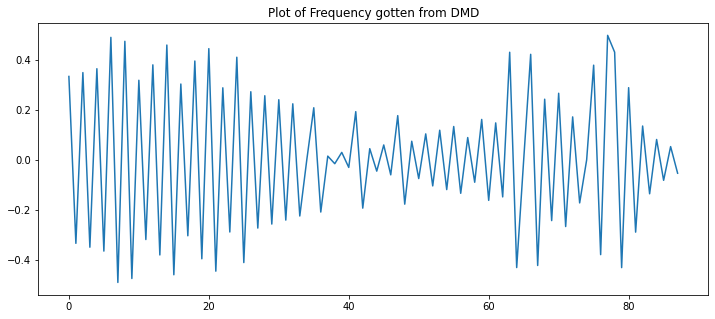

In [0]:
plt.figure(figsize=(12,5))
plt.plot(freq)
plt.title("Plot of Frequency gotten from DMD")

In [0]:
HODMD_modes = h_ODMD.modes
HODMD_modes.T.shape

(88, 256)

In [0]:
# x = np.array([[1,2,3,4,5],
#              [1,2,3,4,5],
#              [1,2,3,4,5],
#              [1,2,3,4,5]])


# np.linalg.norm(x[:,0])

In [0]:
np.linalg.norm(HODMD_modes.T[0])
#HODMD_modes.T[0].shape

0.004657725

- The maginitude of each mode represents spatial correlations between the observable n locations.

In [0]:
Mode_Mags =  np.sum(np.abs(HODMD_modes.T)**2,axis=-1)**(1./2) ##magnitude of each mode....
Mode_Mags.shape

(88,)

- DMD spectrum = $||Mode||^2$

> Indented block

> Indented block





In [0]:
DMD_Spectrum = (Mode_Mags)**2
DMD_Spectrum

array([2.1694379e-05, 2.1694379e-05, 2.3468438e-05, 2.3468438e-05,
       2.4662253e-05, 2.4662253e-05, 2.8295881e-05, 2.8295881e-05,
       2.4164874e-05, 2.4164874e-05, 2.0151425e-05, 2.0151425e-05,
       2.5595004e-05, 2.5595004e-05, 2.0050429e-05, 2.0050429e-05,
       2.0198629e-05, 2.0198629e-05, 2.8499675e-05, 2.8499675e-05,
       2.3271681e-05, 2.3271681e-05, 2.3630946e-05, 2.3630946e-05,
       3.6274727e-05, 3.6274727e-05, 2.9716470e-05, 2.9716470e-05,
       3.1730764e-05, 3.1730764e-05, 3.5567511e-05, 3.5567511e-05,
       3.2400832e-05, 3.2400832e-05, 1.6236483e-05, 2.6500797e-05,
       2.6500797e-05, 1.5318456e-05, 1.5318456e-05, 1.4020314e-05,
       1.4020314e-05, 2.2713664e-05, 2.2713664e-05, 1.3047388e-05,
       1.3047388e-05, 1.2230573e-05, 1.2230573e-05, 1.8316794e-05,
       1.8316794e-05, 1.1316357e-05, 1.1316357e-05, 9.7038992e-06,
       9.7038992e-06, 9.7580441e-06, 9.7580441e-06, 9.4450570e-06,
       9.4450570e-06, 1.0297370e-05, 1.0297370e-05, 1.0928496e

In [0]:
len(DMD_Spectrum)

88

In [0]:
len(freq)

88

In [0]:
#librosa.display.specshow(freq,sr = 22050, x_axis = 'time')

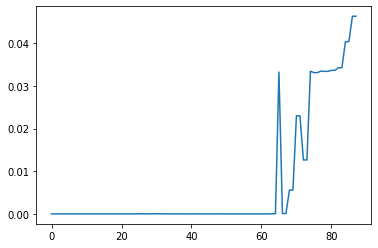

In [0]:
plt.plot(figsize=(10,15))
plt.plot(DMD_Spectrum)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=88).
  """Entry point for launching an IPython kernel.


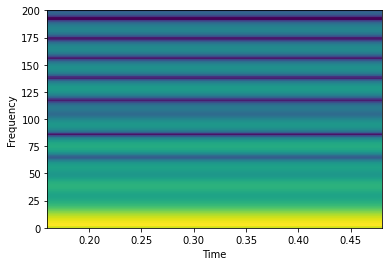

<Figure size 864x720 with 0 Axes>

In [0]:
powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(DMD_Spectrum.T, Fs=400)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.figure(figsize=(12,10))
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=88).
  """Entry point for launching an IPython kernel.


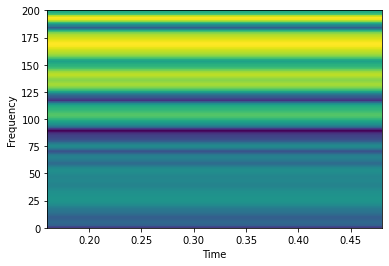

<Figure size 864x720 with 0 Axes>

In [0]:
powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(freq, Fs=400)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.figure(figsize=(12,10))
plt.show()

In [0]:
plt.pcolormesh(Segment_times,sampled_Freq,Magnitude,vmin=0,vmax=amp)

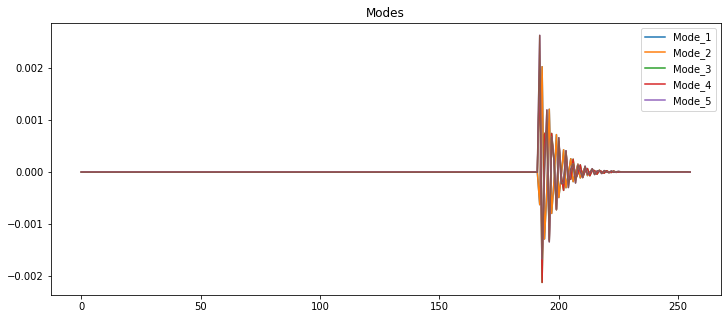

In [0]:
#Visualization all the mode...
legend = ["Mode_1","Mode_2","Mode_3","Mode_4","Mode_5"]
plt.figure(figsize=(12,5))
for m in h_ODMD.modes[:,:6].T:       
  plt.plot(m.real)        
  plt.title("Modes")
  plt.legend(legend)
plt.show()

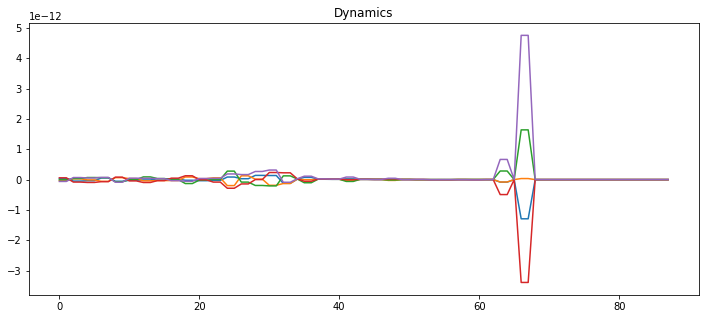

In [0]:
plt.figure(figsize=(12,5))
for d in h_ODMD.dynamics[:,:5].T:  #No transpose here, the row represent time evolution of the modes
  plt.plot(d.real)    #plotting (t,d.real)--> dynamics shows the time evolution of the modes
  plt.title("Dynamics")
plt.show()

In [0]:
N = 64
for i in range(1,N):
  yt = Amp

###Sample Audio Data

In [0]:
data_bird.shape

(110250,)

(441,)


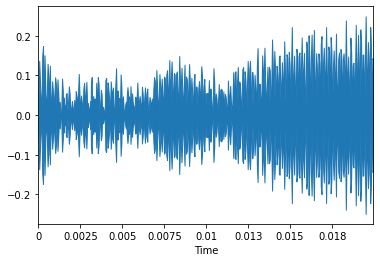

In [0]:
#1 second sample...0.02 sec
bird_1s=data_bird[:441]
print(bird_1s.shape)
_ = librosa.display.waveplot(bird_1s,sr=sample_rate)

In [0]:
MAT_data = hankel(bird_1s,bird_1s)
MAT_data.shape

(441, 441)

In [0]:
MAT_data[:4,:4]

array([[-0.02941924, -0.13688716, -0.08337966, -0.03774157],
       [-0.13688716, -0.08337966, -0.03774157,  0.01642091],
       [-0.08337966, -0.03774157,  0.01642091,  0.14860964],
       [-0.03774157,  0.01642091,  0.14860964,  0.17393196]],
      dtype=float32)

In [0]:
bird_MAT = MAT_data[:,:64]    ###get 1st 64 columns into the new matrix...
bird_MAT                         ##from [z_t ......z_t+N-1]

array([[-0.02941924, -0.13688716, -0.08337966, ..., -0.04386363,
         0.03986505,  0.08394693],
       [-0.13688716, -0.08337966, -0.03774157, ...,  0.03986505,
         0.08394693,  0.0252295 ],
       [-0.08337966, -0.03774157,  0.01642091, ...,  0.08394693,
         0.0252295 , -0.03045134],
       ...,
       [-0.00940839, -0.143604  , -0.1362759 , ..., -0.0658021 ,
        -0.08161871, -0.04386363],
       [-0.143604  , -0.1362759 , -0.13688716, ..., -0.08161871,
        -0.04386363,  0.03986505],
       [-0.1362759 , -0.13688716, -0.08337966, ..., -0.04386363,
         0.03986505,  0.08394693]], dtype=float32)

In [0]:
bird_MAT_step = MAT_data[:,1:65]    ##from [z_t+1 ......z_t+N]
bird_MAT_step                         ##from the 2nd column to the 65th column  

array([[-0.13688716, -0.08337966, -0.03774157, ...,  0.03986505,
         0.08394693,  0.0252295 ],
       [-0.08337966, -0.03774157,  0.01642091, ...,  0.08394693,
         0.0252295 , -0.03045134],
       [-0.03774157,  0.01642091,  0.14860964, ...,  0.0252295 ,
        -0.03045134, -0.00861064],
       ...,
       [-0.143604  , -0.1362759 , -0.13688716, ..., -0.08161871,
        -0.04386363,  0.03986505],
       [-0.1362759 , -0.13688716, -0.08337966, ..., -0.04386363,
         0.03986505,  0.08394693],
       [-0.13688716, -0.08337966, -0.03774157, ...,  0.03986505,
         0.08394693,  0.0252295 ]], dtype=float32)

In [0]:
print(bird_MAT.shape)
print(bird_MAT_step.shape)

(441, 64)
(441, 64)


In [0]:
bird_MAT_PINV = np.linalg.pinv(bird_MAT)    #Calculate the peudoinverse of Zt
bird_MAT_PINV.shape

(64, 441)

In [0]:
from tqdm import tqdm

In [0]:
KT = np.matmul(bird_MAT_step,bird_MAT_PINV)  ####compute
KT.shape

(441, 441)

In [0]:
KT

DeviceArray([[ 0.00716159,  0.1823858 ,  0.00755721, ...,  0.00110454,
              -0.02078029,  0.02055571],
             [-0.01510592,  0.00755702,  0.17908084, ...,  0.00232009,
               0.00462687, -0.03244211],
             [ 0.03705007, -0.01829446,  0.01278508, ..., -0.02524167,
              -0.00127982,  0.01496529],
             ...,
             [ 0.02120003, -0.02078023,  0.00462693, ...,  0.07242799,
               0.30919755,  0.08158638],
             [ 0.15695447,  0.02055555, -0.03244218, ..., -0.03062944,
               0.08158657,  0.21603546],
             [ 0.00716159,  0.1823858 ,  0.00755721, ...,  0.00110454,
              -0.02078029,  0.02055571]], dtype=float32)

In [0]:
pip install pydmd

In [0]:
from pydmd import DMD,HODMD

In [0]:
h_ODMD = HODMD(svd_rank=0,exact=True,opt=True)
h_ODMD.fit(KT)

In [0]:
h_modes = h_ODMD.modes
h_dynamics = h_ODMD.dynamics
print(h_modes.shape)
print(h_dynamics.shape)

(441, 91)
(91, 441)


In [0]:
print("The Eigenvalues of KT are given as: ")
eigens = h_ODMD.eigs
eigens

The Eigenvalues of KT are given as: 


array([-0.96219206+0.22814819j, -0.96219206-0.22814819j,
       -0.903091  +0.360822j  , -0.903091  -0.360822j  ,
       -0.85198486+0.42517722j, -0.85198486-0.42517722j,
       -0.828361  +0.48845267j, -0.828361  -0.48845267j,
       -0.9118517 +0.19688904j, -0.9118517 -0.19688904j,
       -0.76929075+0.59626824j, -0.76929075-0.59626824j,
       -0.90020573+0.05646896j, -0.90020573-0.05646896j,
       -0.6655774 +0.70245254j, -0.6655774 -0.70245254j,
       -0.6055    +0.7419739j , -0.6055    -0.7419739j ,
       -0.5078936 +0.8428303j , -0.5078936 -0.8428303j ,
       -0.37492046+0.9226426j , -0.37492046-0.9226426j ,
       -0.29318863+0.92347825j, -0.29318863-0.92347825j,
       -0.21638834+0.9503172j , -0.21638834-0.9503172j ,
       -0.10530211+0.98056436j, -0.10530211-0.98056436j,
        0.04458902+0.9605482j ,  0.04458902-0.9605482j ,
        0.17782609+0.9424569j ,  0.17782609-0.9424569j ,
        0.25505784+0.9288236j ,  0.25505784-0.9288236j ,
        0.35195497+0.891224j  ,

Number  of Eigenvalues:  91




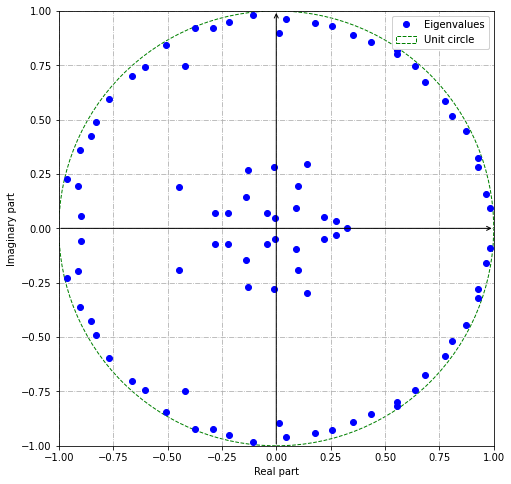

In [0]:
print("Number  of Eigenvalues: ", len(h_ODMD.eigs))
print("\n")
h_ODMD.plot_eigs()

In [0]:
print("Shape of DMD_Modes: ", h_ODMD.modes.shape)
print("Shape of DMD_Dynamics: ",h_ODMD.dynamics.shape)

Shape of DMD_Modes:  (441, 91)
Shape of DMD_Dynamics:  (91, 441)


In [0]:
###frequency from eigen values
freq = ((np.log(eigens)).imag)/(2*np.pi)
freq

DeviceArray([ 0.4629466 , -0.4629466 ,  0.4395035 , -0.4395035 ,
              0.42633006, -0.42633006,  0.41520494, -0.41520494,
              0.46615452, -0.46615452,  0.39505878, -0.39505878,
              0.49002942, -0.49002942,  0.370711  , -0.370711  ,
              0.35893536, -0.35893536,  0.33631495, -0.33631495,
              0.31142947, -0.31142947,  0.2989271 , -0.2989271 ,
              0.28563225, -0.28563225,  0.26702628, -0.26702628,
              0.24261726, -0.24261726,  0.22031903, -0.22031903,
              0.20734693, -0.20734693,  0.19013986, -0.19013986,
              0.17481422, -0.17481422,  0.15519491, -0.15519491,
              0.13751104, -0.13751104,  0.12371743, -0.12371743,
              0.01483371, -0.01483371,  0.10294435, -0.10294435,
              0.02570031, -0.02570031,  0.07536112, -0.07536112,
              0.05303346, -0.05303346,  0.15334333, -0.15334333,
              0.04668735, -0.04668735,  0.09064391, -0.09064391,
              0.24747102,

- The first main concept to understand is that each DMD mode has a relative frequency and/ or decay rate determined by its eigenvalue $\lambda_{j}$

- One might think of it as the mode’s “speed” a fast mode oscillates/ grows/ decays rapidly, while a slow mode takes its time

-  A  mode’s speed should be proportional to $|ln(\lambda_{j})|$.

- So, a mode can be considered “slow” if it has a relatively low frequency or slow growth/ decay rate. This just means that the mode changes somewhat slowly as the system evolves in time.

- We could potentially decide that all eigenvalues within that circle correspond to slow modes while the rest correspond to fast modes.

In [0]:
def plot_me(samples,show_axes=True,show_unit_circle=True,figsize=(8, 8),
                  title=''):
       
        plt.figure(figsize=figsize)
        plt.title(title)
        plt.gcf()
        ax = plt.gca()

        points, = ax.plot(samples.real, samples.imag, 'bo', label='Eigenvalues')
        limit = np.max(np.ceil(np.absolute(samples)))
        ax.set_xlim((-limit, limit))
        ax.set_ylim((-limit, limit))

        plt.ylabel('Imaginary part')
        plt.xlabel('Real part')

        if show_unit_circle:
            unit_circle = plt.Circle( (0., 0.),1.,
                color='green',
                fill=False,
                label='Unit circle',
                linestyle='--')
            ax.add_artist(unit_circle)

        # Dashed grid
        gridlines = ax.get_xgridlines() + ax.get_ygridlines()
        for line in gridlines:
            line.set_linestyle('-.')
        ax.grid(True)

        ax.set_aspect('equal')

        # x and y axes
        if show_axes:
            ax.annotate(
                '',
                xy=(np.max([limit * 0.8, 1.]), 0.),
                xytext=(np.min([-limit * 0.8, -1.]), 0.),
                arrowprops=dict(arrowstyle="->"))
            ax.annotate(
                '',
                xy=(0., np.max([limit * 0.8, 1.])),
                xytext=(0., np.min([-limit * 0.8, -1.])),
                arrowprops=dict(arrowstyle="->"))

        # legend
        if show_unit_circle:
            ax.add_artist(
                plt.legend(
                    [points, unit_circle], ['Eigen_Mode', 'Unit circle'],
                    loc=1))
        else:
            ax.add_artist(plt.legend([points], ['Eigen_Mode'], loc=1))

        plt.show()

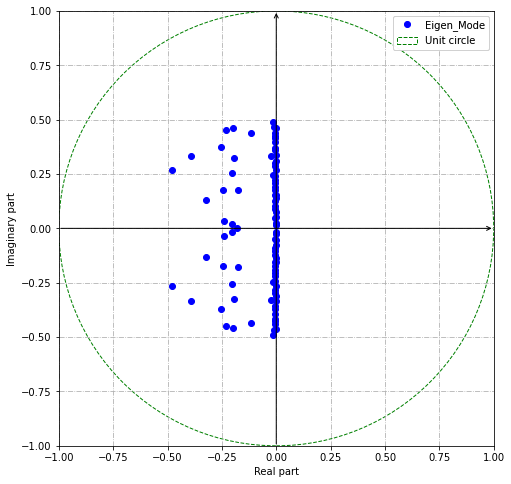

In [0]:
freq_RI = ((np.log(eigens)))/(2*np.pi)
plot_me(freq_RI)

Text(0.5, 1.0, 'Plot of DMDFrequency for 20ms of Bird_chirping audio data')

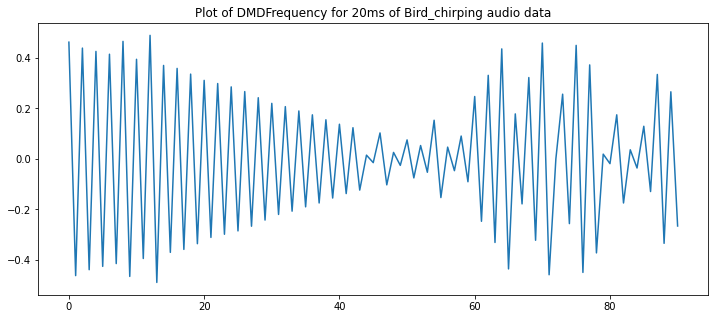

In [0]:
plt.figure(figsize=(12,5))
plt.plot(freq)
plt.title("Plot of DMDFrequency for 20ms of Bird_chirping audio data")

In [0]:
HODMD_modes = h_ODMD.modes
HODMD_modes.T.shape

(91, 441)

In [0]:
np.linalg.norm(HODMD_modes.T[0])
#HODMD_modes.T[0].shape

DeviceArray(0.9888706, dtype=float32)

In [0]:
Mode_Mags =  np.sum(np.abs(HODMD_modes.T)**2,axis=-1)**(1./2) ##magnitude of each mode....
Mode_Mags.shape

(91,)

In [0]:
DMD_Spectrum = (Mode_Mags)**2
DMD_Spectrum

DeviceArray([0.977865  , 0.977865  , 0.9457658 , 0.9457658 , 0.90665376,
             0.90665376, 0.9247679 , 0.9247679 , 0.8702387 , 0.8702387 ,
             0.9473439 , 0.9473439 , 0.81355906, 0.81355906, 0.9364326 ,
             0.9364326 , 0.9171554 , 0.9171554 , 0.96831876, 0.96831876,
             0.9918347 , 0.9918347 , 0.93877167, 0.93877167, 0.9499267 ,
             0.9499267 , 0.9725947 , 0.9725947 , 0.92464095, 0.92464095,
             0.9198471 , 0.9198471 , 0.9277678 , 0.9277678 , 0.9181526 ,
             0.9181526 , 0.92265916, 0.92265916, 0.97922987, 0.97922987,
             0.95845836, 0.95845836, 0.92024225, 0.92024225, 0.97250205,
             0.97250205, 0.9426964 , 0.9426964 , 0.95810187, 0.95810187,
             0.95780367, 0.95780367, 0.96555704, 0.96555704, 0.9480708 ,
             0.9480708 , 0.94171137, 0.94171137, 0.92453885, 0.92453885,
             0.8050198 , 0.8050198 , 0.7346578 , 0.7346578 , 0.23808263,
             0.23808263, 0.10810293, 0.10810293, 0.

In [0]:
len(DMD_Spectrum)

91

In [0]:
len(freq)

91

In [0]:
from scipy.linalg import svd, svdvals

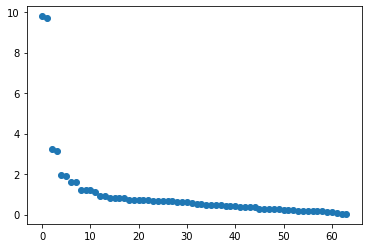

In [0]:
KT_SVD = svdvals(bird_MAT)
plt.plot(KT_SVD,'o')

In [0]:
KT_SVD.shape

(64,)

In [0]:
KT_SVD[KT_SVD > 0.2].shape

(64,)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


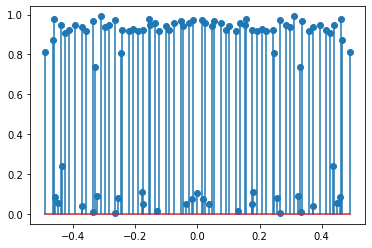

In [0]:
fig, ax = plt.subplots()
ax.stem(freq,DMD_Spectrum,)
plt.show()

In [0]:
bird_1s.shape

(441,)

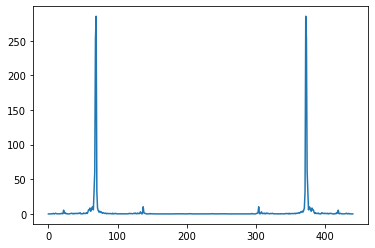

In [0]:
plt.plot(ps)

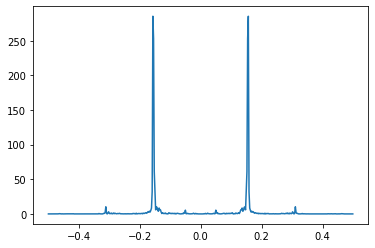

In [0]:

ps = np.abs(np.fft.fft(bird_1s))**2

#time_step = 1 / 30
freqs = np.fft.fftfreq(bird_1s.size)
idx = np.argsort(freqs)

plt.plot(freqs[idx], ps[idx])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=91).
  """Entry point for launching an IPython kernel.


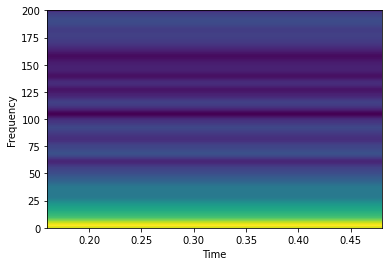

<Figure size 864x720 with 0 Axes>

In [0]:
powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(DMD_Spectrum.T, Fs=400)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.figure(figsize=(12,10))
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=91).
  """Entry point for launching an IPython kernel.


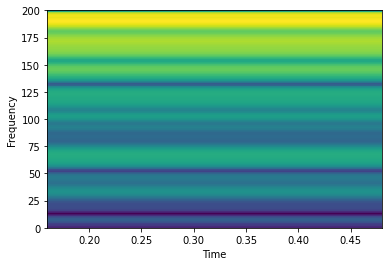

<Figure size 864x720 with 0 Axes>

In [0]:
powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(freq, Fs=400)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.figure(figsize=(12,10))
plt.show()

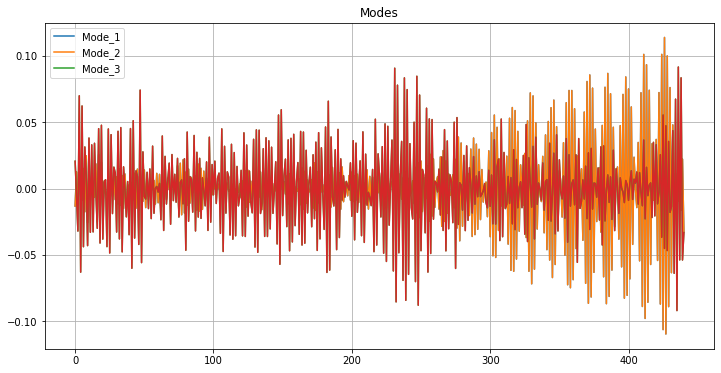

In [0]:
#Visualization all the mode...
legend = ["Mode_1","Mode_2","Mode_3"]
plt.figure(figsize=(12,6))
for m in h_ODMD.modes[:,:4].T:       
  plt.plot(m.real)        
  plt.title("Modes")
  plt.legend(legend)
plt.grid()
plt.show()

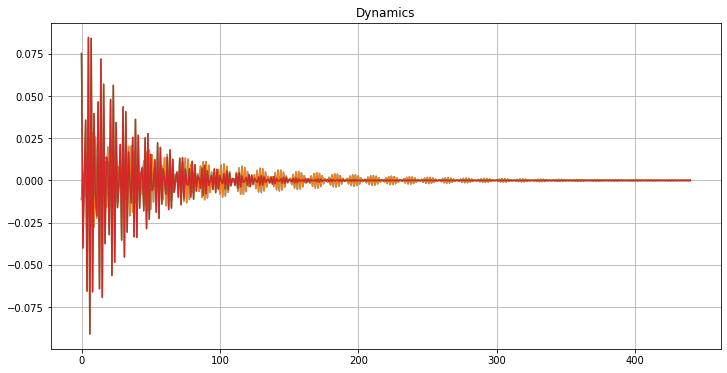

In [0]:
plt.figure(figsize=(12,6))
for d in h_ODMD.dynamics[:4,:]:  
  plt.plot(d.real)    
  plt.title("Dynamics")
plt.grid()
plt.show()

###Multi-Resolution DMD

- Multi-Resolution ultilizes eigenvalues and mode “speed”.

-  mrDMD recursively extracts the “slow” modes at each time scale that it evaluates.

-  What constitutes “slow” or “fast” depends entirely on the eigenvalue in question and what time scale it belongs to

In [0]:
from pydmd import MrDMD

In [0]:
MR_mat = onp.matmul(bird_MAT_step,bird_MAT_PINV)  ####compute
MR_mat.shape

(441, 441)

In [0]:
MR_mat = MR_mat.astype("float64",casting='same_kind' )      #make sure its in float64
MR_mat.dtype

dtype('float64')

In [0]:
mr_DMD = MrDMD(svd_rank=0,exact= True,opt=True,max_cycles=2,max_level=6)      #computes the optimal rank and uses it for truncation;
mr_DMD.fit(MR_mat)

/usr/local/lib/python3.6/dist-packages/pydmd/mrdmd.py:260: RuntimeWarning: invalid value encountered in log
  old_div(np.log(eigs), (2. * np.pi * step)))) <= rho


In [0]:
print(mr_DMD.modes.shape)
#print(mr_DMD.dynamics.shape)

(441, 47)


In [0]:
MR_eigs = mr_DMD.eigs
MR_eigs

array([0.72312226+0.j        , 0.8930762 +0.j        ,
       0.8286609 +0.50168431j, 0.8286609 -0.50168431j,
       0.79790094+0.53454437j, 0.79790094-0.53454437j,
       0.88548231+0.j        , 0.87329171+0.42926619j,
       0.87329171-0.42926619j, 0.63030164+0.j        ,
       0.922792  +0.j        , 0.89037552+0.j        ,
       0.85006088+0.j        , 0.70057792+0.12706406j,
       0.70057792-0.12706406j])

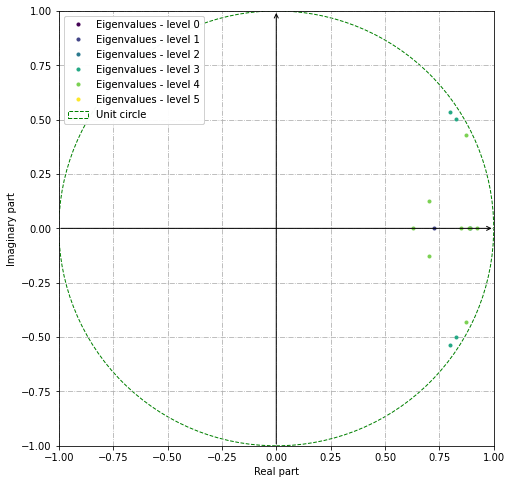

In [0]:
mr_DMD.plot_eigs(show_axes= True,show_unit_circle=True)

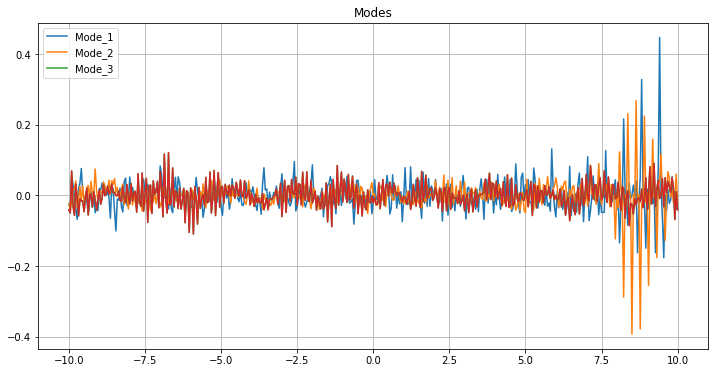

In [0]:
#Visualization of the system Mode
plt.figure(figsize=(12,6))
legend = ["Mode_1","Mode_2","Mode_3"]
for m in mr_DMD.modes[:,:4].T:        #notice the "sys_Mode.T",
  plt.plot(x,m.real)        
  plt.title("Modes")
  plt.legend(legend)
plt.grid()
plt.show()

In [0]:
# plt.figure(figsize=(12,6))
# legend = ["Dynamics_1","Dynamics_2","Dynamics_3"]
# for d in mr_DMD.dynamics[:4,:]:  
#   plt.plot(d.real)   
#   plt.title("Dynamics")
#   plt.legend(legend)
# plt.grid()
# plt.show()

- Computing Frequency and Spectrum 

In [0]:
###frequency from eigen values
mr_freq = ((np.log(MR_eigs)).imag)/(2*np.pi)
mr_freq

DeviceArray([ 0.        ,  0.        ,  0.08664269, -0.08664269,
              0.09394345, -0.09394345,  0.        ,  0.07271224,
             -0.07271224,  0.        ,  0.        ,  0.        ,
              0.        ,  0.02855557, -0.02855557], dtype=float32)

In [0]:
# mr_freq_RI = ((np.log(MR_eigs)))/(2*np.pi)
# plot_me(mr_freq_RI)

- Depiction of slow modes

Text(0.5, 1.0, 'Plot of MR_DMDFrequency for 20ms of Bird_chirping audio data')

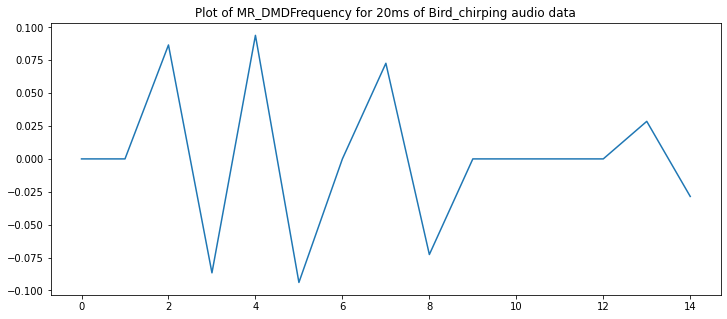

In [0]:
plt.figure(figsize=(12,5))
plt.plot(mr_freq)
plt.title("Plot of MR_DMDFrequency for 20ms of Bird_chirping audio data")

In [0]:
np.linalg.norm(HODMD_modes.T[0])
#HODMD_modes.T[0].shape

DeviceArray(0.9888706, dtype=float32)

In [0]:
mr_Mode_Mags =  np.sum(np.abs(mr_DMD.modes.T)**2,axis=-1)**(1./2) ##magnitude of each mode....
mr_Mode_Mags.shape

(47,)

In [0]:
mr_DMD_Spectrum = (mr_Mode_Mags)**2
mr_DMD_Spectrum

DeviceArray([1.0042225 , 0.96117216, 0.9789162 , 0.9789162 , 0.9849585 ,
             0.9849585 , 0.98397154, 0.98746324, 0.98746324, 0.47958994,
             0.97023004, 0.9821229 , 0.9415547 , 1.0078864 , 1.0078864 ,
             0.        , 0.        , 0.        , 0.        , 0.        ,
             0.        , 0.        , 0.        , 0.        , 0.        ,
             0.        , 0.        , 0.        , 0.        , 0.        ,
             0.        , 0.        , 0.        , 0.        , 0.        ,
             0.        , 0.        , 0.        , 0.        , 0.        ,
             0.        , 0.        , 0.        , 0.        , 0.        ,
             0.        , 0.        ], dtype=float32)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


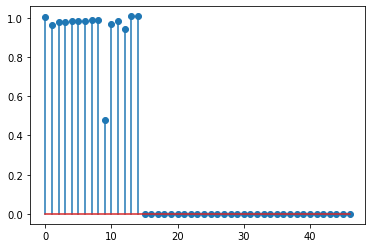

In [0]:
fig, ax = plt.subplots()
ax.stem(mr_DMD_Spectrum)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=47).
  """Entry point for launching an IPython kernel.


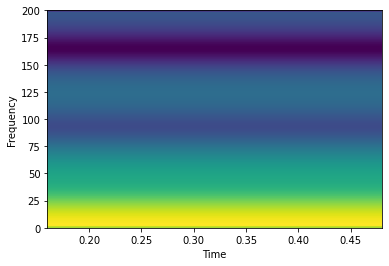

<Figure size 864x720 with 0 Axes>

In [0]:
powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(mr_DMD_Spectrum, Fs=400)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.figure(figsize=(12,10))
plt.show()

###Extracting Mel Frequency Ceptral Coefficient [MFCC]

- The first step in any automatic speech recognition system is to extract features 

- that is to identify the components of the audio signal that are good for identifying the linguistic content of the speech.

- The main point to understand about speech is that the sounds generated by a human are filtered by the shape of the vocal tract including tongue and teeth.

- and this shape determines whoch sounds is carried out.

-  by determining this shape accurately, we can accurately get the representation of the phoneme being produced. 

- The shape of the vocal tract manifests itself in the envelope of the short time power spectrum,

- MFCCs accurately represent this envelope.

###Step 1: Get Audio Signal into frame.

In [0]:
!nvidia-smi

In [0]:
import jax.numpy as jnp
import numpy as np
import decimal as dc
import math
import logging
from scipy.fftpack import dct

In [0]:
pip install pydmd

In [0]:
from pydmd import HODMD

In [0]:
win_len = 0.025                       #20 milliseconds window length
win_step = 0.01                      #10 milliseconds window step  
frame_len = win_len*sample_rate      #num of samples in a frame
frame_step = win_step*sample_rate    #num of samples in steps
num_cep = 13                         #num of septral coefficients   
mode_num = 75
N = 64

In [0]:
def preemphasis(signal, coeff=0.95):
    return np.append(signal[0], signal[1:] - coeff * signal[:-1])

def rolling_window(a, window, step=1):
    shape = a.shape[:-1] + (a.shape[-1] - window + 1, window)
    strides = a.strides + (a.strides[-1],)
    return np.lib.stride_tricks.as_strided(a, shape=shape, strides=strides)[::step] 

def round_half_up(y):
    return int(dc.Decimal(y).quantize(dc.Decimal('1'), rounding=dc.ROUND_HALF_UP))

def get_framed_signal(x,frame_len,frame_step,coeff=0.95,winfunc=lambda x: np.ones((x,))):
  x = preemphasis(x,coeff)
  len_x = len(x)                                 #length of audio signal
  frame_len =  int(round_half_up(frame_len))    #num of samples in each frame(441 sample fo rbird)
  frame_step = int(round_half_up(frame_step))   #num of samples in each frame(220 sampele for bird)

  numframes = 1 + int(math.ceil((1.0 * len_x - frame_len) / frame_step))   #num of frames
  padlen = int((numframes - 1) * frame_step + frame_len)
  zeros = np.zeros((padlen - len_x,))
  padsignal = np.concatenate((x, zeros))

  win = winfunc(frame_len)
  frames = rolling_window(padsignal,window=frame_len, step=frame_step)
  framed_signal = frames * win
  return framed_signal

In [0]:
def get_DMD_Mat(framed_sig,N):                         #get suitable matrix from audio signal
  Matrix_list = []
  for frame in framed_sig:
    hankel_mat = hankel(frame,frame)
    slice_MAT = hankel_mat[:,:N]                       #get the 1st N-colums 
    slice_MAT_step = hankel_mat[:,1:N+1]               #time shifted mat of slice
    slice_MAT_Pinv = jnp.linalg.pinv(slice_MAT)
    DMD_MAT = jnp.matmul(slice_MAT_step,slice_MAT_Pinv)
    Matrix_list.append(DMD_MAT)                        #len(list) == number of frames 
  return Matrix_list                                   #return a list with MATrix for each frame  

In [0]:
                                                                      #computing spectrum with HODMD
def computeDMDSpec(mat_list,rank=mode_num,exact=True,opt=True,d=1):   #mode_num == num of required mode
  Spec_list = [] 
  h_ODMD = HODMD(svd_rank=rank,exact=exact,opt=opt,d=d)
  for DMD_MAT in mat_list:
    h_ODMD.fit(DMD_MAT)
    Mode_Mags =  np.sum(np.abs(h_ODMD.modes.T)**2,axis=-1)**(1./2)      ##magnitude of each mode
    DMD_Spectrum = (Mode_Mags)**2
    Spec_list.append(list(DMD_Spectrum))
  PowSpec = np.array(Spec_list)                                         #each row correspond to the power spectrum of each frame
  return PowSpec                                                        #return matrix of spectrogram 

In [0]:
def get_filterBanks(sample_rate,mode_num,num_filters=26,
                    low_freq=300,high_freq = 8000):
    n_ = (mode_num-1)*2
    low_mel =  2595 * np.log10(1+low_freq/700.)               #converting of the freqncies to mel values
    high_mel = 2595 * np.log10(1+high_freq/700.)

    mel_points = np.linspace(low_mel,high_mel,num_filters+2)   #getting the melpoints
    frq_points = 700*(10**(mel_points/2595.0)-1)    
    FFT_bin = np.floor((n_+1)*frq_points/sample_rate)  

    filter_bank = np.zeros([num_filters,n_//2+1])
    for j in range(0,num_filters):
        for i in range(int(FFT_bin[j]), int(FFT_bin[j+1])):
            filter_bank[j,i] = (i - FFT_bin[j]) / (FFT_bin[j+1]-FFT_bin[j])
        for i in range(int(FFT_bin[j+1]), int(FFT_bin[j+2])):
            filter_bank[j,i] = (FFT_bin[j+2]-i) / (FFT_bin[j+2]-FFT_bin[j+1])
    return filter_bank  
    

In [0]:
def filterBanksEnergy(framed_signal,sample_rate,mode_num,win_len=0.02,
                win_step=0.01,N=64,winfunc=lambda x:np.ones((x,))):
  
  mat_list = get_DMD_Mat(framed_signal,N)
  DMD_PowMAT = computeDMDSpec(mat_list)                           ##matrix of power matrix spectrum
                                                                  ##Total Energy in each , 
  Frame_energy = np.sum(DMD_PowMAT,axis=1)                        ##size of energy == total num_of_frame(single array)
  Frame_energy = np.where(Frame_energy == 0,np.finfo(float).eps,Frame_energy) 

  filter_banks = get_filterBanks(sample_rate,mode_num)
  filterB_energy = np.dot(DMD_PowMAT,filter_banks.T)                  #compute the filterbank energies
  filterB_energy = np.where(filterB_energy == 0,np.finfo(float).eps,filterB_energy)
                                                                      #compute the log of the filter bank energy     
  #filterB_energy_log = np.log(filterB_energy)
  return filterB_energy, Frame_energy

In [0]:
def lift_MFCC(cepstra, Lift_coeff=22):
  nframes,ncoeff = np.shape(cepstra)
  n = np.arange(ncoeff)
  lift = 1 + (Lift_coeff/2.)*np.sin(np.pi*n/Lift_coeff)
  return lift*cepstra

In [0]:
def get_MFCC(filterB_energy,Frame_energy):
    MFSC = np.log(filterB_energy)              #log of the filter Bank energy == Mel Freq septral coefficient
    MFCC = dct(MFSC, type=2, axis=1, 
            norm='ortho')[:,:num_cep]           #These 13 are the MFCC
    MFCC = lift_MFCC(MFCC)                      #lifting high frequencies by a fact of 22
    MFCC[:,0] = np.log(Frame_energy)           #replace first cepstral coefficient with log of frame energy
    return MFCC

###Make a Test

In [0]:
win_len = 0.02                   #20 milliseconds window length
win_step = 0.01                      #10 milliseconds window step  
frame_len = win_len*sample_rate      #num of samples in a frame
frame_step = win_step*sample_rate    #num of samples in steps
num_cep = 13                         #num of septral coefficients   
mode_num = 75
N = 64

In [0]:
print(frame_len)
print(frame_step)

441.0
220.5


In [0]:
 numframes = 1 + int(math.ceil((1.0 * len(data_bird) - frame_len) / frame_step))   #num of frames
 numframes

499

In [0]:
framed_signal = get_framed_signal(data_bird,frame_len,frame_step)
framed_signal.shape

(498, 441)

- 498 frames with 441 samples in each frame

In [0]:
#framed_sig[0]  ##the rows represent the frames
framed_sig = framed_signal[:50,:]
framed_sig.shape

(50, 441)

In [0]:
%time
filterB_energy, Frame_energy  = filterBanksEnergy(framed_sig,sample_rate,mode_num) 

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 6.68 µs


In [0]:
Frame_energy.shape   ##energy vale in each frame

(50,)

In [0]:
%time
MFCC = get_MFCC(filterB_energy,Frame_energy)
np.mean(MFCC,axis=1)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs


array([-11.48450849, -11.4166603 , -11.6097552 , -11.43034313,
       -11.31556121, -11.50035354, -11.34664345, -11.44790513,
       -11.41224495, -11.48312549, -11.34995551, -11.39235439,
       -11.37901138, -11.30602999, -11.53460734, -11.40528667,
       -11.42081661, -11.4572356 , -11.45780769, -11.35605553,
       -11.47382946, -11.40470907, -11.46849259, -11.41041092,
       -11.59398177, -11.46965724, -11.44659929, -11.48746819,
       -11.41910694, -11.238509  , -11.37662547, -11.52335049,
       -11.39186351, -11.49752031, -11.42600888, -11.49211849,
       -11.41818504, -11.45990874, -11.52672684, -11.51974785,
       -11.62673809, -11.46908384, -11.4228695 , -11.48030878,
       -11.51966181, -11.25213513, -11.4705997 , -11.49317139,
       -11.48124363, -11.44538494])

In [0]:
MFCC.shape

(10, 13)

###Simplified Approch of Extracting MFCC

- Get the DMD power spectrum

- Compute Mel-Spectrogram from the power spectrum

- Compute MFCC using librosa

In [0]:
print(framed_sig.shape)
mat_list = get_DMD_Mat(framed_sig,N)
len(mat_list)

(50, 441)


50

In [0]:
%timeit
powSpec = computeDMDSpec(mat_list,rank = mode_num,exact=True,opt=True,d=1)
powSpec.shape

(50, 75)

In [0]:
# Frame_energy = np.sum(powSpec,axis=1)  
# Frame_energy

array([58.308598, 57.806885, 58.83992 , 57.64281 , 58.660114, 58.94824 ,
       58.262035, 59.985184, 58.906097, 59.475494], dtype=float32)

In [0]:
#S = librosa.feature.melspectrogram( S=powSpec, sr=sample_rate, n_mels=40)
#S.shape

def get_mel_MFCC(powSpec,sample_rate, n_mels=40,n_mfcc=40):
  MelSpec = librosa.feature.melspectrogram(S=powSpec, sr=sample_rate, n_mels=n_mels)
  MFCC = librosa.feature.mfcc(S=librosa.power_to_db(MelSpec), n_mfcc=n_mfcc)
  MFCCS_scaled = np.mean(MFCC,axis=1)
  return MelSpec, MFCCS_scaled

MelSpec, MFCCS_scaled = get_mel_MFCC(powSpec,sample_rate)

/usr/local/lib/python3.6/dist-packages/librosa/filters.py:284: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  warnings.warn('Empty filters detected in mel frequency basis. '


In [0]:
MFCCS_scaled

array([-212.89679656,  -58.76225545,  -38.02224861,  -15.4199342 ,
          0.45995518,    6.05808724,    2.94750848,   -4.64415971,
        -11.88628531,  -14.3869332 ,  -11.8968265 ,   -6.46609209,
         -0.96625994,   -0.32930385,   -3.88453445,  -11.34720037,
        -16.97969915,  -16.33646347,  -10.46934543,   -4.23741986,
         -1.47324535,   -6.18706543,  -17.89100084,  -34.10948879,
        -48.18179004,  -52.78815691,  -45.39804643,  -27.45909564,
         -2.61250845,   20.47909888,   34.7671724 ,   34.0223785 ,
         19.14981234,    2.01091603,   -7.11321106,   -5.36699414,
          2.66775918,    8.79099238,    8.58715692,    4.90098969])

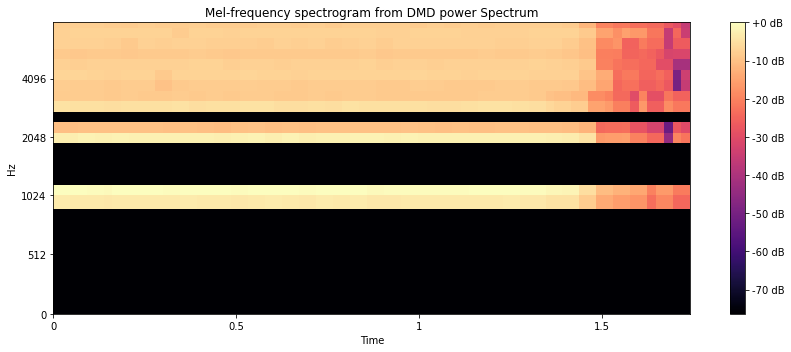

In [0]:
plt.figure(figsize=(12, 5))
S_dB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_dB, x_axis='time',y_axis='mel', sr=sample_rate,fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram from DMD power Spectrum')
plt.tight_layout()
plt.show()

In [0]:
MFCC2 = librosa.feature.mfcc(S=librosa.power_to_db(S), n_mfcc=40)
MFCC2


array([[-331.36844069, -331.36714628, -331.54882443, ..., -390.65620596,
        -391.93035425, -390.33129086],
       [-130.10934445, -130.10978173, -130.00328189, ...,  -84.94285268,
         -80.94008307,  -82.35617122],
       [   7.07459553,    7.07298646,    7.07490454, ...,    7.87365582,
          -0.7863945 ,   -2.68200279],
       ...,
       [   2.33727411,    2.3370553 ,    2.3724997 , ...,    4.08703039,
           3.33835263,    3.22369641],
       [  13.90803092,   13.9082263 ,   13.85215427, ...,    8.12770302,
           6.63743339,    7.3905414 ],
       [  -8.39442287,   -8.39439642,   -8.35878967, ...,   -6.01917125,
          -3.53318296,   -4.34438716]])

In [0]:
MFCC2.shape

(26, 75)

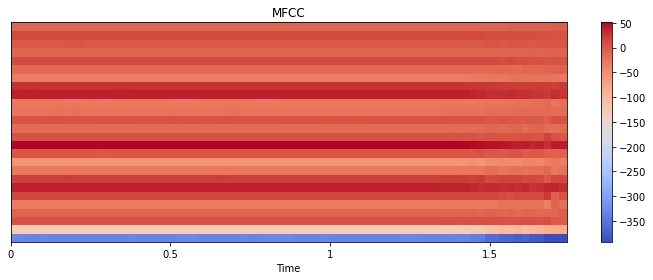

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
librosa.display.specshow(MFCC2, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()

In [0]:
print("length of signal ", len(data_bird))
print("signal sample ", sample_rate)

length of signal  110250
signal sample  22050


In [0]:
win_len = 0.02
win_step = 0.01
len_data = len(data_bird)
frame_len = win_len*sample_rate
frame_step = win_step*sample_rate
print(frame_len)
print(frame_step)

441.0
220.5


In [0]:
padsignal = onp.concatenate((data_bird, zeros))
len(padsignal)

110250

In [0]:
data_bird[:10]

array([-0.02941924, -0.13688716, -0.08337966, -0.03774157,  0.01642091,
        0.14860964,  0.17393196,  0.02405372, -0.15086085, -0.06791999],
      dtype=float32)

In [0]:
framed_sig = get_framed_signal(data_bird,frame_len,frame_step)   #,winfunc=onp.hamming
framed_sig.shape

(498, 441)

In [0]:
framed_sig

array([[-0.02941924, -0.13688716, -0.08337966, ..., -0.00940839,
        -0.143604  , -0.1362759 ],
       [-0.05560232, -0.05559895,  0.03886322, ..., -0.21963772,
        -0.30139461, -0.15212359],
       [ 0.05813915,  0.18127893,  0.07106501, ..., -0.21006913,
         0.28848186,  0.45528719],
       ...,
       [ 0.02442319,  0.04186882,  0.02770495, ..., -0.01555084,
         0.02147683,  0.03972168],
       [-0.0259572 , -0.0453102 , -0.02094297, ..., -0.03281289,
        -0.02402605, -0.00229126],
       [ 0.02941732,  0.04721724,  0.01393045, ...,  0.        ,
         0.        ,  0.        ]])

- 498 rows with 441 samples each row represent a frame

In [0]:
#framed_sig[0]  ##the rows represent the frames
x = framed_sig[:2,:]
x.shape


(2, 441)

In [0]:
def get_DMD_Mat(framed_sig,N):
  Matrix_list = []
  for frame in framed_sig:
    hankel_mat = hankel(frame,frame)
    slice_MAT = hankel_mat[:,:N]                #get the 1st N-colums 
    slice_MAT_step = hankel_mat[:,1:N+1]        #time shifted mat of slice
    slice_MAT_Pinv = np.linalg.pinv(slice_MAT)
    DMD_MAT = np.matmul(slice_MAT_step,slice_MAT_Pinv)
    Matrix_list.append(DMD_MAT)
  return Matrix_list

In [0]:
mat_list = get_DMD_Mat(x,64)
mat_list

[DeviceArray([[ 0.00716169,  0.1823858 ,  0.00755721, ...,  0.0011045 ,
               -0.02078031,  0.02055587],
              [-0.01510588,  0.00755705,  0.17908084, ...,  0.00232007,
                0.00462689, -0.03244219],
              [ 0.03705014, -0.01829451,  0.0127851 , ..., -0.02524159,
               -0.00127985,  0.01496529],
              ...,
              [ 0.02120016, -0.02078029,  0.00462691, ...,  0.07242793,
                0.30919743,  0.08158658],
              [ 0.15695429,  0.02055555, -0.03244228, ..., -0.03062944,
                0.08158655,  0.2160357 ],
              [ 0.00716169,  0.18238585,  0.00755721, ...,  0.00110451,
               -0.0207803 ,  0.02055587]], dtype=float32),
 DeviceArray([[-0.00788645,  0.07473154, -0.00791755, ...,  0.0125392 ,
                0.0122979 ,  0.00028628],
              [-0.00263645, -0.00791745,  0.07603207, ...,  0.02458296,
                0.00599266,  0.0114847 ],
              [-0.00344864, -0.00199051, -0.00931412

In [0]:
test_list = get_DMD_Mat(x,5)


In [0]:
mat1 = test_list[0][0:5,0:5]
mat2 = test_list[1][0:5,0:5]



In [0]:
a = [mat1,mat2]
a

[DeviceArray([[-8.7317720e-04,  2.2139320e-02,  4.8018787e-03,
               -1.2108528e-02, -6.5117800e-03],
              [-1.4682734e-02,  4.8018489e-03,  2.3420133e-02,
                9.9414382e-03, -5.7617412e-03],
              [-4.8918780e-03, -1.2108489e-02,  9.9414317e-03,
                2.4147579e-02,  5.5010305e-03],
              [-1.5570028e-03, -6.5117674e-03, -5.7617431e-03,
                5.5010216e-03,  1.0818737e-02],
              [-1.0913130e-02,  9.8624788e-03,  6.3976008e-03,
                3.7432932e-05,  9.8735932e-04]], dtype=float32),
 DeviceArray([[ 9.23768035e-04,  4.74772789e-03,  5.66023751e-04,
               -2.67729932e-03,  4.66043159e-04],
              [-2.33015604e-03,  5.66015311e-04,  2.50735763e-03,
               -4.88045480e-04, -1.42790179e-03],
              [-1.00374615e-04, -2.67730490e-03, -4.88043588e-04,
                2.03712075e-03,  5.73923135e-05],
              [ 1.35308306e-03,  4.66050580e-04, -1.42789911e-03,
              

In [0]:
def computeDMDSpec(mat_list,rank=mode_num,exact=True,opt=True,d=1):   #mode_num == num of required mode
  Spec_list = [] 
  h_ODMD = HODMD(svd_rank=rank,exact=exact,opt=opt,d=d)
  for DMD_MAT in mat_list:
    h_ODMD.fit(DMD_MAT)
    Mode_Mags =  np.sum(np.abs(h_ODMD.modes.T)**2,axis=-1)**(1./2) ##magnitude of each mode....
    DMD_Spectrum = (Mode_Mags)**2
    Spec_list.append(list(DMD_Spectrum))
  PowSpec = np.array(Spec_list) 
  return PowSpec

In [0]:
PowSpec = computeDMDSpec(mat_list,rank=75)
PowSpec  ##each row correspond to the power spectrum of each frame

DeviceArray([[0.9696041 , 0.9696041 , 0.9567077 , 0.9567077 , 0.9647367 ,
              0.9647367 , 0.9415396 , 0.9415396 , 0.95742494, 0.95742494,
              0.91923314, 0.91923314, 0.93197906, 0.93197906, 0.89403397,
              0.89403397, 0.9461069 , 0.9461069 , 0.9845308 , 0.9845308 ,
              0.93436694, 0.93436694, 0.9236141 , 0.9236141 , 0.9187702 ,
              0.9187702 , 0.91776276, 0.91776276, 0.91428745, 0.91428745,
              0.9358492 , 0.9358492 , 0.9649635 , 0.9649635 , 0.7476524 ,
              0.7476524 , 0.94755673, 0.94755673, 0.9402276 , 0.9402276 ,
              0.9916427 , 0.9916427 , 0.8762139 , 0.8762139 , 0.97506964,
              0.97506964, 0.9024875 , 0.9024875 , 0.9526258 , 0.9526258 ,
              0.923933  , 0.923933  , 0.93629885, 0.93629885, 0.95359665,
              0.95359665, 0.9668673 , 0.9668673 , 0.92787486, 0.92787486,
              0.90206325, 0.90206325, 0.7581331 , 0.7581331 , 0.04448152,
              0.05398649, 0.05398649, 

In [0]:
PowSpec.shape    #each row is the power of each frame

(2, 75)

In [0]:
# x = [[1, 2,4], [7, 5, 6], [10,9,8]]
# y = np.array(x)
# y

In [0]:
pip install pydmd

In [0]:
from pydmd import HODMD
import tqdm

In [0]:
s1[0].shape

(82,)

In [0]:
def get_nfft(sample_rate,win_len):  
  samples_win_len = sample_rate*win_len     #win_len in seconds
  nfft = 1
  while nfft < samples_win_len:
    nfft *=2
  return nfft


nfft = get_nfft(sample_rate,win_len)
nfft

512

- Filter bank....

- Computing a Mel-filterbank: The filters are stored in the rows, the columns correspond to FFT_bins.

- The filters are returned as an array of size num_filters* (num_filters/2 + 1)

In [0]:
sample_rate

22050

In [0]:
mode_num = 75   ###this is my own nfft
n_ = (mode_num -1)*2

In [0]:
def get_filterBanks(sample_rate,mode_num,num_filters=26,low_freq=300,high_freq = 8000):

    n_ = (mode_num-1)*2
    low_mel =  2595 * np.log10(1+low_freq/700.)      #converting of the freqncies to mel values
    high_mel = 2595 * np.log10(1+high_freq/700.)

    mel_points = onp.linspace(low_mel,high_mel,num_filters+2)   #getting the melpoints
    frq_points = 700*(10**(mel_points/2595.0)-1)    
    FFT_bin = onp.floor((n_+1)*frq_points/sample_rate)  

    filter_bank = onp.zeros([num_filters,n_//2+1])
    for j in range(0,num_filters):
        for i in range(int(FFT_bin[j]), int(FFT_bin[j+1])):
            filter_bank[j,i] = (i - FFT_bin[j]) / (FFT_bin[j+1]-FFT_bin[j])
        for i in range(int(FFT_bin[j+1]), int(FFT_bin[j+2])):
            filter_bank[j,i] = (FFT_bin[j+2]-i) / (FFT_bin[j+2]-FFT_bin[j+1])
    return filter_bank  

In [0]:
banks = get_filterBanks(sample_rate,mode_num)

In [0]:
banks.shape   ###filters 

(26, 75)

In [0]:
def preemphasis(signal, coeff=0.95):
    return onp.append(signal[0], signal[1:] - coeff * signal[:-1])

In [0]:
data_bird

array([-0.02941924, -0.13688716, -0.08337966, ...,  0.02988552,
        0.07565519,  0.03861739], dtype=float32)

In [0]:
preemphasis(data_bird)

array([-0.02941924, -0.10893889,  0.04666314, ...,  0.04807362,
        0.04726395, -0.03325504], dtype=float32)

- Compute Mel-filterbank energy features from an audio signal

- returns: 2 values.:

- The first is a numpy array of size (NUMFRAMES by nfilt) containing features. Each row holds 1 feature vector. 

- The second return value is the energy in each frame (total energy, unwindowed)
    

In [0]:
x2 = [[1, 2, -3], [7, 5, 6], [10, 9, 8]]
y = np.array(x2)

In [0]:
print(y)
ene = np.sum(y,axis=1)     #sum along the row
ene

[[ 1  2 -3]
 [ 7  5  6]
 [10  9  8]]


DeviceArray([ 0, 18, 27], dtype=int32)

In [0]:
np.log(2.220446e-16)

DeviceArray(-36.04365, dtype=float32)

In [0]:
energy_spec  = np.sum(PowSpec,axis=1)
print(energy_spec.shape)
energy_spec    #size of energy == total nm of frame

(2,)


DeviceArray([59.72313, 57.63278], dtype=float32)

In [0]:
print("Power Spectrum ", PowSpec.shape)
print("Filter banks ", banks.shape)

Power Spectrum  (2, 75)
Filter banks  (26, 75)


In [0]:
filterbankEnergy = np.dot(PowSpec,banks.T)
filterbankEnergy

DeviceArray([[0.9567077 , 0.        , 0.9567077 , 0.9647367 , 0.9647367 ,
              0.9415396 , 0.9415396 , 0.95742494, 0.95742494, 0.91923314,
              0.91923314, 1.3979685 , 1.8070405 , 1.3931239 , 1.4383724 ,
              1.9439797 , 1.8633574 , 2.3041914 , 2.2954144 , 2.2946434 ,
              2.8294744 , 2.5269032 , 3.251674  , 3.77958   , 3.729798  ,
              4.1992464 ],
             [0.8764049 , 0.        , 0.8764049 , 0.91362095, 0.91362095,
              0.81713235, 0.81713235, 0.91928434, 0.91928434, 0.92438525,
              0.92438525, 1.3620709 , 1.8540719 , 0.9811275 , 0.9665464 ,
              1.743974  , 1.6548762 , 2.3579555 , 2.3166318 , 2.3888288 ,
              2.719624  , 2.764319  , 3.273923  , 3.832284  , 3.7885933 ,
              4.2610974 ]], dtype=float32)

In [0]:
high_

148

In [0]:
from scipy.fftpack import dct

In [0]:
def filterBanksEnergy(signal,sample_rate,mode_num,win_len=0.02,
                win_step=0.01,N=64,coeff=0.97,winfunc=lambda x:np.ones((x,))):
  signal = preemphasis(signal,coeff)
  framed_signal = get_framed_signal(signal,win_len*sample_rate,
                                  win_step*sample_rate,winfunc)
  mat_list = get_DMD_Mat(framed_signal,N)
  DMD_PowMAT = computeDMDSpec(mat_list)      ##matrix of power matrix spectrum
                                             ##Total Energy in each , 
  Frame_energy = np.sum(DMD_PowMAT,axis=1)   ##size of energy == total num_of_frame(single array)
  Frame_energy = np.where(Frame_energy == 0,np.finfo(float).eps,Frame_energy) 

  filter_banks = get_filterBanks(sample_rate,mode_num)
  filterB_energy = np.dot(DMD_PowMAT,filter_banks.T)   #compute the filterbank energies
  filterB_energy = np.where(filterB_energy == 0,np.finfo(float).eps,filterB_energy)
                                                #compute the log of the filter bank energy     
  filterB_energy_log = np.log(filterB_energy)
  return filterB_energy, Frame_energy,filterB_energy_log

In [0]:
small_set = data_bird[:882]
small_set.shape

(882,)

In [0]:
 filterB_energy, Frame_energy = filterBanksEnergy(small_set,sample_rate,mode_num)

In [0]:
filterB_energy.shape

(3, 26)

In [0]:
import numpy as onp

In [0]:
MFSC = onp.log(filterB_energy)    #MEL_fREQ SPECTRAL COEFFICIENT [mfsc]
filterB_energy_log.shape         #num_frames*num of filters

(3, 26)

In [0]:
num_cep = 13 #num pf ceptrum to keep 

In [0]:
MFCC  = dct(filterB_energy_log, type=2, axis=1, norm='ortho')[:,:num_cep] #THESE 13 ARE THE MFCC
MFCC

array([[ -4.7645254 , -12.385166  ,  -8.764622  ,  -8.460515  ,
         -7.165965  ,  -6.237024  ,  -4.7712536 ,  -3.0385165 ,
         -1.1358428 ,   0.72281504,   2.2472582 ,   3.9291651 ,
          5.7436056 ],
       [ -4.7608194 , -12.301756  ,  -8.747647  ,  -8.606775  ,
         -7.236004  ,  -6.211524  ,  -4.867606  ,  -3.0972798 ,
         -0.95109224,   0.6635499 ,   2.2217295 ,   4.0164604 ,
          5.7192373 ],
       [ -4.7830453 , -12.429651  ,  -8.689881  ,  -8.475523  ,
         -7.1688943 ,  -6.1779504 ,  -4.6873155 ,  -3.0495007 ,
         -1.1290917 ,   0.79128075,   2.2823403 ,   3.8679917 ,
          5.7870398 ]], dtype=float32)

In [0]:
def lift_MFCC(cepstra, Lift_coeff=22):
    if Lift_coeff > 0:
        nframes,ncoeff = np.shape(cepstra)
        n = np.arange(ncoeff)
        lift = 1 + (Lift_coeff/2.)*np.sin(np.pi*n/Lift_coeff)
        return lift*cepstra
    else:
        # values of L <= 0, do nothing
        return cepstra

In [0]:
MFCC = lift_MFCC(MFCC)
MFCC.shape      ###the columns REPRESENT EACH CEPTRAL

(3, 13)

In [0]:
MFCC[:,0] = onp.log(Frame_energy) #### replace first cepstral coefficient with log of frame energy
MFCC

array([[   4.07622051,  -81.51422871, -147.26560669, -262.44564878,
        -345.84014989, -419.73229686, -413.84201963, -319.47019226,
        -137.58574958,   96.49919319,  317.5946545 ,  565.79977798,
         811.71734142],
       [   4.07157135,  -80.96525559, -146.98039729, -266.98265027,
        -349.2203265 , -418.01623827, -422.19930864, -325.64857293,
        -115.20673387,   88.58701983,  313.98680518,  578.37030029,
         808.27348371],
       [   4.07040501,  -81.80701186, -146.00979758, -262.91119694,
        -345.98151796, -415.75683761, -406.56151751, -320.62507123,
        -136.76798702,  105.63968613,  322.55264646,  556.99080276,
         817.85568891]])

In [0]:
MFCC[:,0]

array([4.07622051, 4.07157135, 4.07040501])

In [0]:
onp.log(Frame_energy)

array([4.0762205, 4.0715714, 4.070405 ], dtype=float32)

In [0]:
def get_MFCC(filterB_energy,Frame_energy):
    MFSC = onp.log(filterB_energy)       #log of the filter Bank energy == Mel Freq septral coefficient
    MFCC = dct(MFSC, type=2, axis=1, 
            norm='ortho')[:,:num_cep]    #THESE 13 ARE THE MFCC
    MFCC = lift_MFCC(MFCC)               #lifting high frequencies by a fact of 22
    MFCC[:,0] = onp.log(Frame_energy)    #replace first cepstral coefficient with log of frame energy
    return MFCC

In [0]:
mf = get_MFCC(filterB_energy,Frame_energy)
mf

array([[  4.07622051, -31.77368829, -35.92669394, -47.12138956,
        -49.78231049, -51.16522587, -44.43585512, -31.15630686,
        -12.50103128,   8.35171048,  26.71548591,  47.1499815 ,
         68.28018951],
       [  4.07157135, -31.55970233, -35.85711468, -47.93599561,
        -50.26887343, -50.9560389 , -45.33321031, -31.75885298,
        -10.46767553,   7.66693603,  26.41200017,  48.19752502,
         67.99049845],
       [  4.07040501, -31.88781316, -35.62032865, -47.20497744,
        -49.80265986, -50.68061872, -43.6541188 , -31.26893635,
        -12.42672943,   9.14279223,  27.13254319,  46.41590023,
         68.79653616]])

In [0]:
mf.shape   ##returns number of frames *numcep

(3, 13)